In [88]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
from warnings import filterwarnings
import matplotlib.pyplot as plt

In [89]:
filterwarnings(action='ignore')

In [90]:
train_df = pd.read_csv('dataset/train.csv')

In [91]:
train_df

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,ff85154c8,1065000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,ffb6b3f4f,48000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,ffcf61eb6,2800000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,ffea67e98,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


## EDA

### Normalizing the target

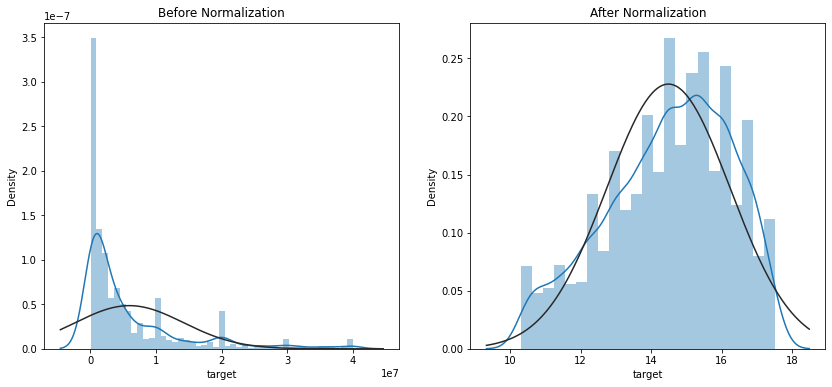

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.distplot(train_df['target'], fit=stats.norm, ax=ax[0])
ax[0].set_title('Before Normalization')

# use log1p instead of log to get the normalized value for even tiny values -> 0
train_df['target'] = np.log1p(train_df['target'])
ax[1].set_title('After Normalization')
sns.distplot(train_df['target'], fit=stats.norm, ax=ax[1])
plt.show()

In [109]:
# check for duplicated rows
print('num of duplicated rows: ', train_df.duplicated().sum())

# drop ID bcause there is no need to keep it
train_df.drop(['ID'], axis=1, inplace=True)

num of duplicated rows:  0


In [110]:
# check for null values
print('num of null values', train_df.isnull().sum().sum())

num of null values 0


In [112]:
# check if there're any features with 0 variance(they give us no information)

zero_var = []
for col in train_df.columns:
    if train_df[col].var() == 0:
        zero_var.append(col)

print('num of columns with zero variance: ',len(zero_var))

num of columns with zero variance:  256
